In [1]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes as load
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

shap.initjs()

c:\Users\acard\.virtualenvs\pcs-exercises-8q7Km9bV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X, y = load(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

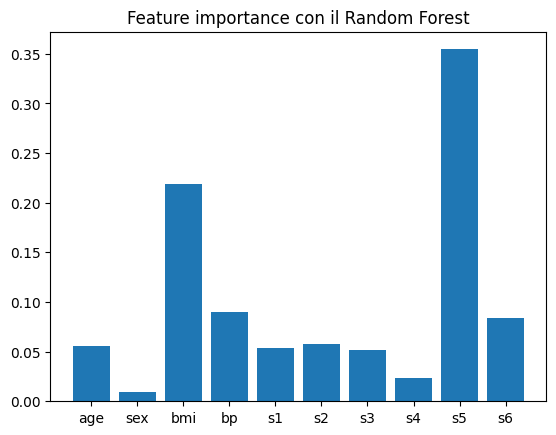

In [3]:
x = range(len(model.feature_importances_))
heights = model.feature_importances_

plt.bar(x, heights)
plt.xticks(x, list(X.columns))
plt.title('Feature importance con il Random Forest')
plt.show()

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [5]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

In [6]:
shap.force_plot(explainer.expected_value, shap_values[1, :], X.iloc[1, :])

Il precedente plot è chiamato *force plot*. In pratica:
* la baseline (ovvero la probabilità media predetta) di glicemia predetta è di $151.1$;
* il primo paziente ha un valore di glicemia predetto di $182.81$, più alto della media;
* il secondo paziente ha un valore di glicemia predetto di $73.32$, più basso della media.

Per entrambi i pazienti, i valori di *s5* e *bmi* influiscono sul valore di glicemia, aumentandolo nel primo caso, e diminuendolo nel secondo.

Il plot successivo è invece chiamato *feature importance plot*.

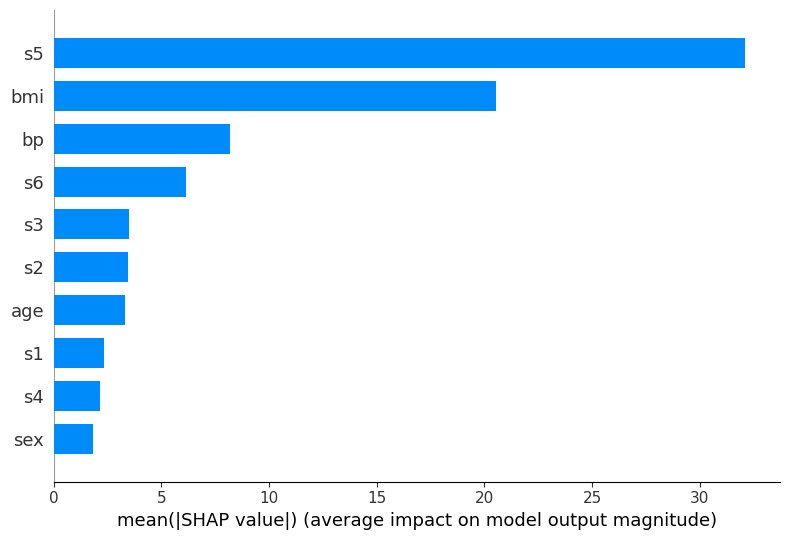

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar")

Nel feature importance plot vediamo l'importanza complessiva di ciascuna feature. Come prevedibile, s5 ed il bmi sono le feature più importanti.

Infine, nel *summary plot* vediamo l'effetto combinato dell'importanza di ciascuna feature e degli effetti che essa ha sulla predizione. Ogni punto è il valore di Shapley per una feature e un'istanza:

* la posizione sull'asse $y$ è determianta dalla feature;
* la posizione sull'asse $x$ è il valore di Shapley;
* il colore rappresenta il valore delle feature, da basso (blu) ad alto (rosso).

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


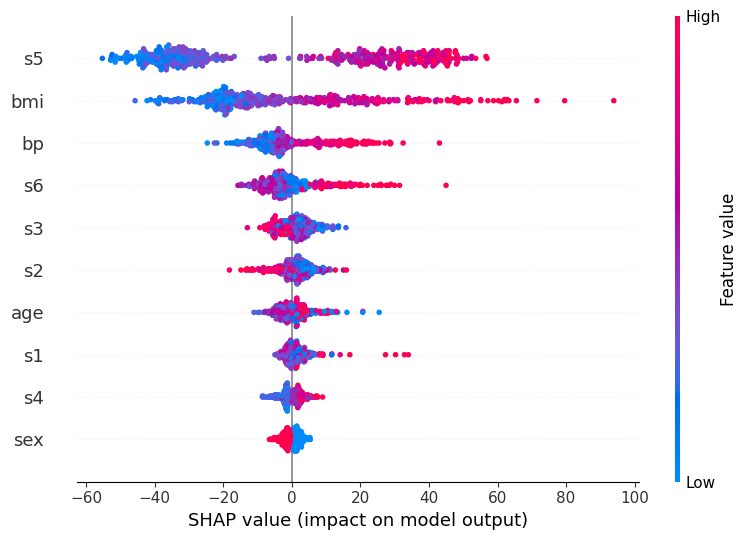

In [8]:
shap.summary_plot(shap_values, X)

In questo plot, vediamo un'indicazione della relazione tra il valore di una feature ed il suo impatto sulla predizione. Ad esempio, valori alti di s5 e di bmi aumentano la predizione, mentre valori bassi diminuiscono la predizione complessiva.